In [1]:
#files in the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**This note book comprises of the following in brief**

1. Data formatting
2. Exploratory Data Analysis
3. Model Selection
4. Metrics Evaluations
5. Model prediction and submission

In [2]:
#importation of data manipulation, plotting and grid formating Modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

#metrics evaluation Modules
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test  = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.head() #Taking a snapshot on the train table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.info() # code gives us some more detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**From the above code we realise that we have both categorical variables and numerical ones in both the train and test dataframes.
we also realise that there are 4 variables with missing values which include: Age,Cabin,Fare and Embarked in the train and test dataframes.**

In [9]:
#brief summary on the numerical columns
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**From the code above we can see that the average age of the people who boarded the ship was about 29 years although we also have some older people as old as 80 years.
The average fare was 32 in as much as we had tickets that were as expensive as 512.**

In [10]:
#brief summary on categorical variables
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Davidson, Mr. Thornton",male,347082,B96 B98,S
freq,1,577,7,4,644


**Using the code above, we can note that the common port where most passengers embarked from was Southampton(S), there were also more male than female passengers on this ship.
We have 147 unique cabin string values.**

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**We have 177 records with missing age, 2 records with missing embarked and the most records with missing values are from the Cabin variable.**

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**In the test dataframe we have 1 record with a missing Fare, 86 records with missing Age and 327 records
with missing cabin entries.**

In [13]:
All_rows = train.shape[0] 

In [14]:
Survived = train[train['Survived']==1]
len(Survived)

342

In [15]:
Did_Not_Survive= train[train['Survived']==0]
len(Did_Not_Survive)

549

In [16]:
percent_of_survived = (len(Survived)/All_rows)*100
percent_of_Not_survive= (len(Did_Not_Survive)/All_rows)*100

In [17]:
print("The percentage of passengers who survived: %.2f%% "%percent_of_survived)
print("The percentage of passengers who did not survive: %.2f%%"%percent_of_Not_survive)

The percentage of passengers who survived: 38.38% 
The percentage of passengers who did not survive: 61.62%


In [18]:
train.groupby('Sex').Sex.count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Code above shows that we had more males than females.

In [19]:
train.groupby('Pclass').Pclass.count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

From the code above, we see that most passengers used the 3rd class
probably because it was less costly

In [20]:
train.groupby('Embarked').Embarked.count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

**We can see from the code above that most people boarded the ship from Southampton(S)**

In [21]:
train.groupby(['Sex','Pclass']).PassengerId.count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: PassengerId, dtype: int64

**The code above shows that we had more males passengers in the 1st class than females. The highest number of females were in the 3rd class whereas the highest number of males were in the 3rd class. Generally, there were more males passengers across all the classes than females.**

In [22]:
train.groupby(['Sex','Survived']).PassengerId.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

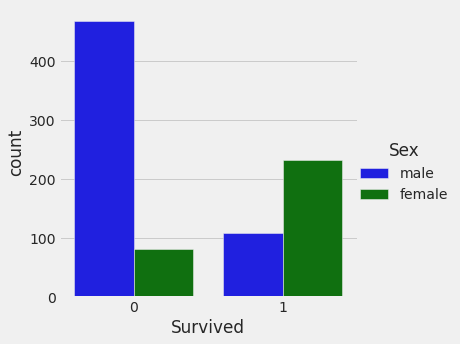

In [23]:
fig, ax = plt.subplots()

sns.catplot("Survived", hue="Sex", data=train, kind="count", 
            palette={'male':"Blue", 'female':"Green"}, ax=ax)

plt.close(1) # delete the extra figure we don't need

ax.legend(title="Gender")
plt.show()

**From the above code, we can see that there were more women who survived than men.
A nearly 3/4 of men died on the ship and 3/4 of women survived.**

In [24]:
train.groupby(['Pclass','Survived']).PassengerId.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

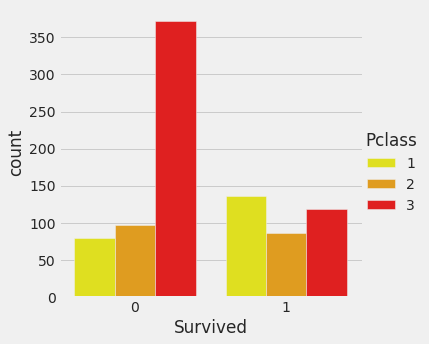

In [25]:
fig, ax= plt.subplots()

sns.catplot("Survived", hue="Pclass", data=train, kind="count", 
            palette={1:"yellow", 2:"orange", 3:"red"},ax=ax)

ax.legend(title="Passenger Class")
ax.set_title("Pclass vs. Survival for Titanic Passengers");

plt.close(1)# we delete the extra figure created that we don't need

**From the above code, we realise that most survivers were from the upper class,non-survivers were from the third class.**

In [26]:
table =pd.crosstab(train['Parch'],train['Survived'])
table

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


**From the code above, we realise that the highest number of survivers did not have any family relation**

Text(0, 0.5, 'Frequency')

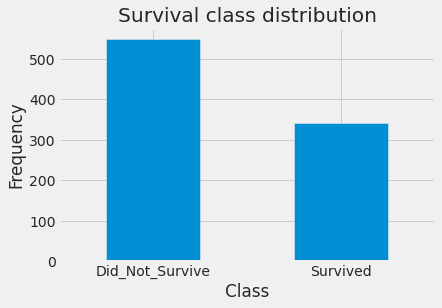

In [27]:
# Let's plot the survival class against the Frequency
labels = ['Did_Not_Survive','Survived']
classes = pd.value_counts(train['Survived'], sort = True)
classes.plot(kind = 'bar',rot=0)
plt.title("Survival class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

Generally we had much more count of non-survivers than those who survived from the plot above. 

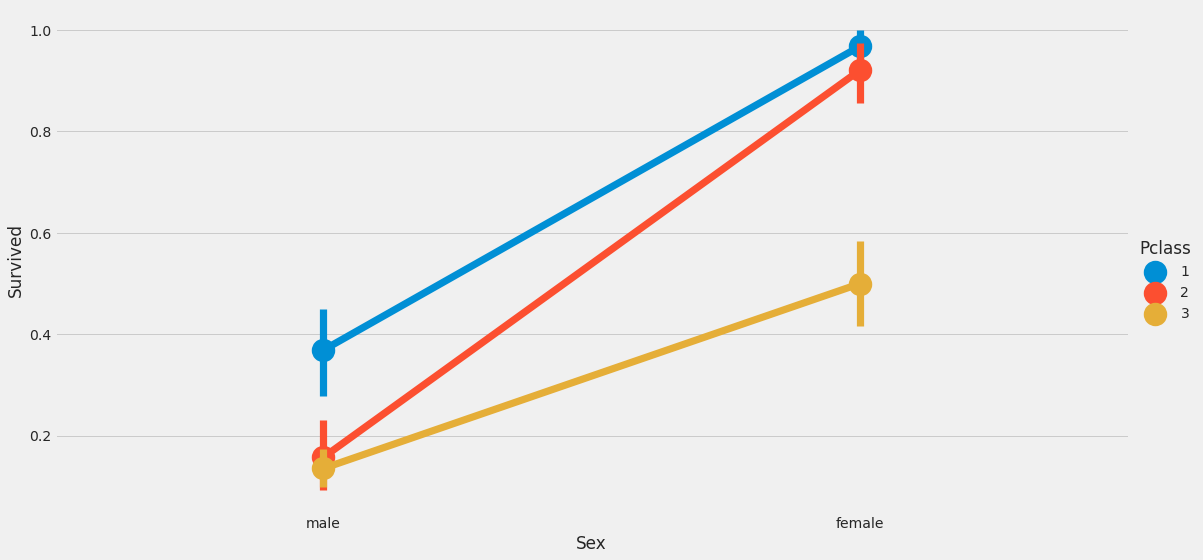

In [28]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=8, aspect=2, data=train)

**From our plot above, we can see that women from class 1 have 99% chances of survival whereas men have close to 40% survival chances in the same class.
Women from the 3rd class have about 50% chances of survival whereas men have less than 20% survival chances in the same class.**

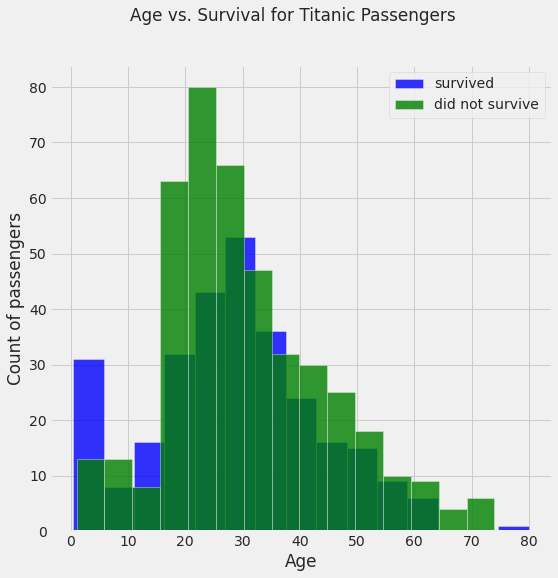

In [29]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(train[train["Survived"]==1]["Age"], bins=15, alpha=0.8, color="blue", label="survived")
ax.hist(train[train["Survived"]==0]["Age"], bins=15, alpha=0.8, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

**The highest number of passengers who did not survive were between ages of 15 and 30 years.
The highest number of passengers who survived were between ages of 15 and 35 years old.
The histogram for graphs is generally skewed to the right.
We can see that we also had more elderly people who did not survive compared to the elderly who survived.**

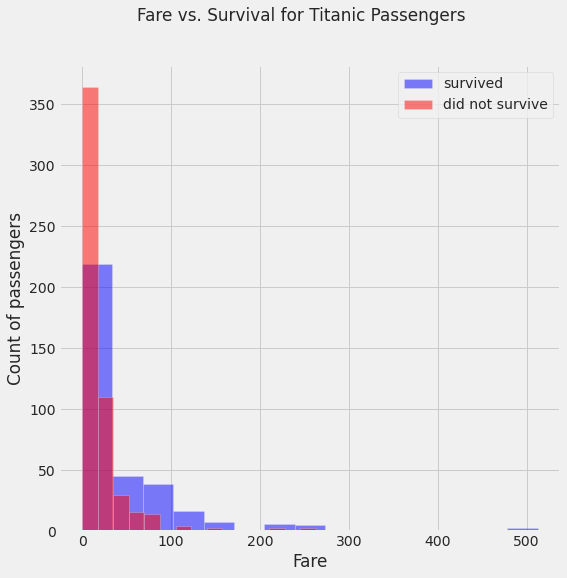

In [30]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(train[train["Survived"]==1]["Fare"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(train[train["Survived"]==0]["Fare"], bins=15, alpha=0.5, color="red", label="did not survive")

ax.set_xlabel("Fare")
ax.set_ylabel("Count of passengers")

fig.suptitle("Fare vs. Survival for Titanic Passengers")

ax.legend();

**The histogram above shows that most passengers who did not survive had cheaper fares.
We see that passengers who survived had a little more costly fares than those who did not survive.
The distribution is skewed to the right with few people being able to aford costly fares as well as surviving.**

In [31]:
train.groupby(['SibSp','Survived']).PassengerId.count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

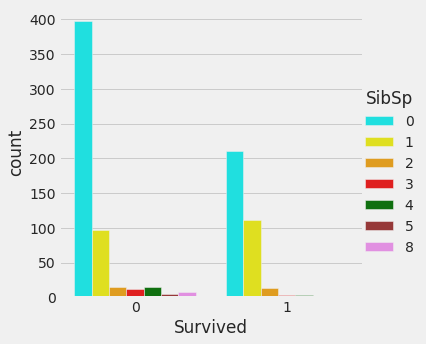

In [32]:
fig, ax = plt.subplots(figsize=(10,10))

sns.catplot("Survived", hue="SibSp", data=train, kind="count", 
            palette={1:"yellow", 2:"orange", 3:"red",4:'green',5:'brown',0:'cyan',8:'violet'}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="spouses/sib aboard ")

**From the catplot we can see that we had more non-survivers who had no siblings or spouses.
It can be noted also that the highest number of survivers had no siblings or spouses.**

In [33]:
train.groupby(['Parch','Survived']).PassengerId.count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

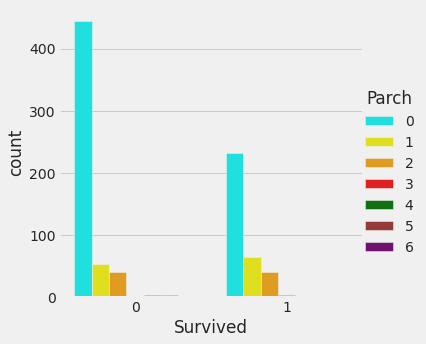

In [34]:
fig, ax = plt.subplots(figsize=(10,6))

sns.catplot("Survived", hue="Parch", data=train, kind="count", 
            palette={1:"yellow", 2:"orange", 3:"red",4:'green',5:'brown',0:'cyan',6:'purple'}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="parents/children aboard ")

**From the plot above, we can see that there we more non-survivers who did not travel with a parent or children compared to the survivers who did not travel with a parent or children.
However most survivers had one parent or a single child.**

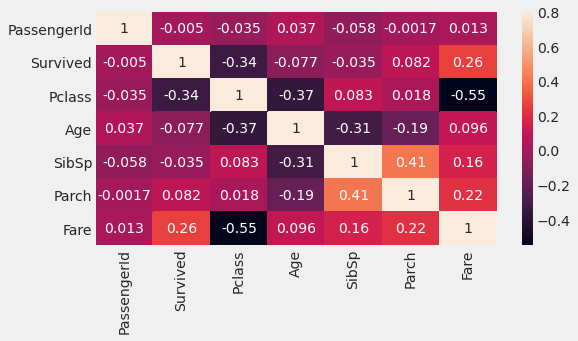

In [35]:
# heat map of correlation of features
correlation_matrix = train.corr()
fig = plt.figure(figsize=(8,4))
sns.heatmap(correlation_matrix,vmax=0.8,annot=True) 
plt.show()

**From the correlation matrix, we can see some features that are positively correlated to the target column and some features are negatively correlated. we will use most of the columns here.**

FEATURE PREPROCESSING AND SELECTION.
We are going to do the following:
1. Preprocessing on some variables of high significance as seen in the matrix above.
2. Feature selection by droping those features that  won't be of great significance in our modelling process
3. We shall combine the train and test data before doing the preprocessing.

In [36]:
cols_to_drop= ['Name','Ticket','Cabin']

In [37]:
train = train.drop(columns=cols_to_drop,axis=1)
test = test.drop(columns=cols_to_drop,axis=1)
y_train = train['Survived']
train = train.drop(columns='Survived',axis=1)

In [38]:
# combining train and test dataset
data_combined = [train, test]

In [39]:
for dataset in data_combined:
    dataset['Age']= dataset['Age'].fillna(dataset['Age'].median())

In [40]:
train.isnull().sum()['Age']# shows no missing values in age

0

In [41]:
train.isnull().sum()['Age']# shows no missing values in age

0

In [42]:
#lets do some preprocessing on the fare column to fill in the nan value with median value
for dataset in data_combined:
    dataset['Fare']= dataset['Fare'].fillna(dataset['Fare'].median())

In [43]:
test.isnull().sum()['Fare'] # double check to see that there are no nan values in Fare

0

**Lets do some preprocessing on the emabarkation variable and fill in missing values with the common embarkation port. 'S' = Southampton**

In [44]:
for dataset in data_combined:
    dataset['Embarked']= dataset['Embarked'].fillna('S')

In [45]:
train.isnull().sum()['Embarked'] # shows that there are no more missing values in this column.

0

In [46]:
#converting Pclass to a categorical variable
for dataset in data_combined:
    dataset['Pclass']= dataset['Pclass'].astype('str')

In [47]:
train.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C


In [48]:
test.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


In [49]:
#selection of categorical variables
cat_cols = [cname for cname in dataset.columns 
                    if  dataset[cname].dtype == "object"]

In [50]:
Train_cat_colsOH= pd.get_dummies(train[cat_cols])
Test_cat_colsOH= pd.get_dummies(test[cat_cols])

In [51]:
Train_cat_colsOH.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [52]:
Test_cat_colsOH.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,1,0
1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,0,1,0
3,0,0,1,0,1,0,0,1
4,0,0,1,1,0,0,0,1


In [53]:
#Select numerical columns
num_cols = [cname for cname in dataset.columns 
            if dataset[cname].dtype in ['int64', 'float64']]

In [54]:
train_num_data = pd.DataFrame(train[num_cols])
test_num_data = pd.DataFrame(test[num_cols])

In [55]:
train =pd.concat([Train_cat_colsOH, train_num_data],axis=1) 
test =pd.concat([Test_cat_colsOH, test_num_data],axis=1) 

In [56]:
train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Age,SibSp,Parch,Fare
0,0,0,1,0,1,0,0,1,1,22.0,1,0,7.2500
1,1,0,0,1,0,1,0,0,2,38.0,1,0,71.2833
2,0,0,1,1,0,0,0,1,3,26.0,0,0,7.9250
3,1,0,0,1,0,0,0,1,4,35.0,1,0,53.1000
4,0,0,1,0,1,0,0,1,5,35.0,0,0,8.0500


In [57]:
test.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Age,SibSp,Parch,Fare
0,0,0,1,0,1,0,1,0,892,34.5,0,0,7.8292
1,0,0,1,1,0,0,0,1,893,47.0,1,0,7.0000
2,0,1,0,0,1,0,1,0,894,62.0,0,0,9.6875
3,0,0,1,0,1,0,0,1,895,27.0,0,0,8.6625
4,0,0,1,1,0,0,0,1,896,22.0,1,1,12.2875


In [58]:
#lets drop the PassengerId column from the test and train features.
X_train = train.drop(columns='PassengerId',axis=1)
X_test = test.drop(columns='PassengerId',axis=1).copy()

In [59]:
X_train.shape , y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

**Model evaluations on various models.**

In [60]:
LOG_R_clf = LogisticRegression()
LOG_R_clf.fit(X_train, y_train)
y_pred_LR = LOG_R_clf.predict(X_test)
LOG_R_score=LOG_R_clf.score(X_train,y_train)*100
print("The Logistic Regression train Accuracy = {:.2f}".format(LOG_R_score))

The Logistic Regression train Accuracy = 80.58


In [61]:
SVC_clf = SVC()
SVC_clf.fit(X_train, y_train)
y_pred_SVC = SVC_clf.predict(X_test)
SVC_score =SVC_clf.score(X_train,y_train)*100
print("The SVC train Accuracy = {:.2f}".format(SVC_score))

The SVC train Accuracy = 68.69


In [62]:
KNN_clf = KNeighborsClassifier(n_neighbors = 3)
KNN_clf.fit(X_train, y_train)
y_pred_KNN = KNN_clf.predict(X_test)
KNN_score =KNN_clf.score(X_train,y_train)*100
print("The KNeighbors Classifier train Accuracy = {:.2f}".format(KNN_score))

The KNeighbors Classifier train Accuracy = 84.18


In [63]:
RF_clf = RandomForestClassifier(n_estimators=100)
RF_clf.fit(X_train, y_train)
prediction_train= RF_clf.predict(X_train)
prediction_test = RF_clf.predict(X_test)
RF_score=RF_clf.score(X_train,y_train)*100
print("The Random Forest train Accuracy = {:.2f}".format(RF_score))

The Random Forest train Accuracy = 97.98


In [64]:
GB_clf = GradientBoostingClassifier(n_estimators=100)
GB_clf.fit(X_train,y_train)
y_pred_GB = GB_clf.predict(X_test)
GB_score=GB_clf.score(X_train,y_train)*100
print("Gradient Boosting Classifier train Accuracy = {:.2f}".format(GB_score))

Gradient Boosting Classifier train Accuracy = 90.35


**Visualise the Train accuracy of the models to as to select one with a better accuracy performance.**

<Figure size 720x576 with 0 Axes>

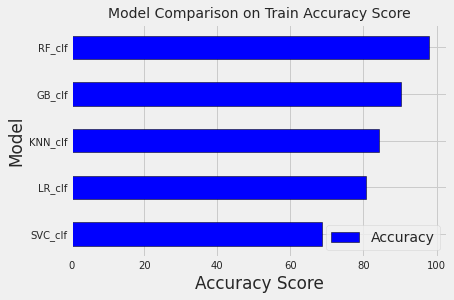

In [65]:
fig = plt.figure(figsize=(10,8))

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['LR_clf', 'SVC_clf',
                                           'KNN_clf', 'RF_clf',
                                            'GB_clf'],
                                 'Accuracy': [LOG_R_score,SVC_score,KNN_score,RF_score,GB_score ]})

# Horizontal bar chart of train accuracy
model_comparison.sort_values('Accuracy').plot(x = 'model', y = 'Accuracy', 
                                kind = 'barh',color = 'blue', edgecolor = 'black')
# Plot formatting
plt.ylabel('Model'); plt.yticks(size = 10); plt.xlabel('Accuracy Score'); plt.xticks(size = 10)
plt.title('Model Comparison on Train Accuracy Score', size = 14);

**We are going to consider the classifier with the highest accuracy, which is the Random Forest Classifier and take it's prediction on the test set as the prediction for the model.**

In [66]:
GBC_precison_score  = precision_score(y_train,prediction_train)
GBC_recall_score    = recall_score(y_train,prediction_train)
GBC_f1_score        = f1_score(y_train,prediction_train)

In [67]:
print(classification_report(y_train,prediction_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       549
           1       0.98      0.97      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



In [68]:
print("The gradient boosting precision_score = {:.2f}".format(GBC_precison_score))

The gradient boosting precision_score = 0.98


In [69]:
print("The gradient boosting recall_score = {:.2f}".format(GBC_recall_score))

The gradient boosting recall_score = 0.97


In [70]:
print("The gradient boosting f1_score = {:.2f}".format(GBC_f1_score))

The gradient boosting f1_score = 0.97


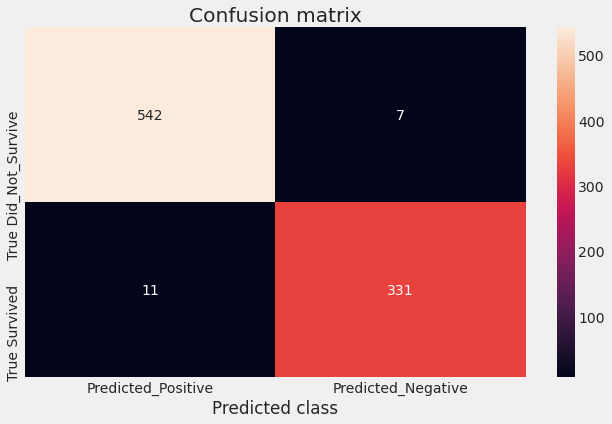

In [71]:
#comfusion matrix plot
Label_1 = ['Predicted_Positive', 'Predicted_Negative']
Label_2 = [ 'True Did_Not_Survive','True Survived', ]
conf_matrix = confusion_matrix(y_train, prediction_train)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, xticklabels=Label_1, yticklabels=Label_2, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('')
plt.xlabel('Predicted class')
plt.show()

**According to our classification report, the positive class was considered as class 0 and the negative class as class 1. 
From the heatmap above, we can see that the model mis-classified 7 passengers as False Negatives(FN), implying that it classified them among passengers who survived and yet they did not survive in the true sense.
The model also mis-classified 11 passengers as False Positives (FP), implying that it classified them among those who did not survive and yet in real sense they survived**

In [72]:
#Create a submission file on Kaggle
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction_test
    })

submission.to_csv('submission.csv', index=False)

In [73]:
submission.head(10).set_index('PassengerId')

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1
897,0
898,0
899,0
900,1


**This notebook is still under improvements. All comments are welcome**